In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
path_sample = "/content/drive/MyDrive/data/sample.csv"
path_test = "/content/drive/MyDrive/data/test.csv"
path_train = "/content/drive/MyDrive/data/train.csv"

sample = pd.read_csv(path_sample)

In [ ]:
test = pd.read_csv(path_test, sep=';')
train = pd.read_csv(path_train, sep=';')

# Basic information from the databases

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         2128 non-null   int64
 1   Predicted  2128 non-null   int64
dtypes: int64(2)
memory usage: 33.4 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 216.2+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [ ]:
train['name'].value_counts()

Maruti Swift Dzire VDI                 90
Maruti Alto 800 LXI                    61
Maruti Alto LXi                        57
Maruti Swift VDI                       44
Maruti Swift VDI BSIV                  42
                                       ..
Maruti Swift 1.3 ZXI                    1
Toyota Innova 2.5 Z Diesel 7 Seater     1
Nissan Micra Active XL Petrol           1
Datsun GO Anniversary Edition           1
Honda Amaze Anniversary Edition         1
Name: name, Length: 1801, dtype: int64

In [ ]:
test['name'].value_counts()

Maruti Swift Dzire VDI                          39
Maruti Alto 800 LXI                             21
BMW X4 M Sport X xDrive20d                      21
Maruti Ertiga VDI                               17
Maruti Swift VDI BSIV                           17
                                                ..
Fiat Linea Emotion (Diesel)                      1
Hyundai i20 2015-2017 Sportz Option 1.4 CRDi     1
Toyota Etios Liva 1.4 GD                         1
Chevrolet Aveo 1.4 LS                            1
Toyota Innova 2.5 V Diesel 8-seater              1
Name: name, Length: 1051, dtype: int64

#Check the difference between the train and the test dataset in terms of name

In [ ]:
car_names_train = list(train['name'].unique())
car_names_test = list(test['name'].unique())
for i in car_names_test:
    if i not in car_names_train:
        print(i)

Hyundai Grand i10 Sportz Celebration Edition
Mahindra Scorpio Intelli Hybrid S10 4WD
Hyundai Santro Xing XG AT eRLX Euro II
Mahindra Renault Logan 1.4 GLX Petrol
Skoda Laura Ambiente
Hyundai Verna 1.6 SX VTVT (O)
Volkswagen Vento Petrol Trendline
Tata Tiago 1.2 Revotron XZ Plus Dual Tone
Volkswagen CrossPolo 1.5 TDI
Honda Jazz Select Edition Active
Skoda Rapid 1.6 TDI Elegance
Nissan Kicks XV BSIV
Tata Venture EX 7 Str Captain Seats
Ford Ecosport 1.5 Petrol Ambiente
Hyundai Getz 1.5 CRDi GVS
Chevrolet Captiva 2.2 LTZ AWD
Mahindra Scorpio Getaway
Tata New Safari Dicor VX 4X2 BS IV
Chevrolet Tavera LS B3 10 Seats BSII
Chevrolet Tavera B3 LT L1 10 Seats BSIII
Tata Indica V2 DiCOR DLG BS-III
Maruti Swift ZXI BSIII
Chevrolet Enjoy 1.4 LTZ 7
Tata Indica V2 Emax CNG GLX
Honda Amaze S CVT Petrol BSIV
Mahindra Scorpio SLX 2.6 Turbo 8 Str
Maruti Swift Dzire 1.2 Lxi BSIV
Volvo XC60 Inscription D5 BSIV
Ford EcoSport 1.5 Diesel Ambiente BSIV
Hyundai Santro Xing GL CNG
Mahindra Marazzo M6 8Str
Toyot

#Due to the abundance number of names, i decide to remove them altogether

In [ ]:
print(train.shape, test.shape)
train.drop('name', axis=1, inplace=True)
test.drop('name', axis=1, inplace=True)
print(train.shape, test.shape)

(6000, 13) (2128, 13)
(6000, 12) (2128, 12)


#Converting variables in the datasets into numeric

In [ ]:
train['mileage'] = train['mileage'].str.replace(' km/kg', '')
train['mileage'] = train['mileage'].str.replace(' kmpl', '')
train['mileage'] = pd.to_numeric(train['mileage'], errors='coerce')

In [ ]:
test['mileage'] = test['mileage'].str.replace(' km/kg', '')
test['mileage'] = test['mileage'].str.replace(' kmpl', '')
test['mileage'] = pd.to_numeric(test['mileage'], errors='coerce')

In [ ]:
train['engine'] = train['engine'].str.replace(' CC', '')
train['engine'] = pd.to_numeric(train['engine'], errors='coerce')

In [ ]:
test['engine'] = test['engine'].str.replace(' CC', '')
test['engine'] = pd.to_numeric(test['engine'], errors='coerce')

In [ ]:
train['max_power'] = train['max_power'].str.replace(' bhp', '')
train['max_power'] = train['max_power'].str.replace('null', '0.0')
train['max_power'] = pd.to_numeric(train['max_power'], errors='coerce')

In [ ]:
test['max_power'] = test['max_power'].str.replace(' bhp', '')
test['max_power'] = test['max_power'].str.replace('null', '0.0')
test['max_power'] = pd.to_numeric(test['max_power'], errors='coerce')

In [ ]:
split = train['torque'].str.split(' ', n = 1, expand = True)  
train['torque_value'] = split[0]
train['rpm'] = split[1]
train.drop(columns =['torque'], inplace = True)

In [ ]:
splitz = test['torque'].str.split(' ', n = 1, expand = True)  
test['torque_value'] = splitz[0]
test['rpm'] = splitz[1]
test.drop(columns =['torque'], inplace = True)

In [ ]:
train['torque_value'] = train['torque_value'].str.replace('Nm@', '')
train['torque_value'] = train['torque_value'].str.replace('nm@', '')
train['torque_value'] = train['torque_value'].str.replace('@', '')
train['rpm'] = train['rpm'].str.replace('(kgm@ rpm)', '')
train['rpm'] = train['rpm'].str.replace('rpm', '')
train['torque_value'] = train['torque_value'].str.replace('null', '0.0')
train['rpm'] = train['rpm'].str.replace('null', '0.0')
train['rpm'] = pd.to_numeric(train['rpm'], errors='coerce')
train['torque_value'] = pd.to_numeric(train['torque_value'], errors='coerce')

In [ ]:
test['torque_value'] = test['torque_value'].str.replace('Nm@', '')
test['torque_value'] = test['torque_value'].str.replace('nm@', '')
test['torque_value'] = test['torque_value'].str.replace('@', '')
test['rpm'] = test['rpm'].str.replace('(kgm@ rpm)', '')
test['rpm'] = test['rpm'].str.replace('rpm', '')
test['torque_value'] = test['torque_value'].str.replace('null', '0.0')
test['rpm'] = test['rpm'].str.replace('null', '0.0')
test['rpm'] = pd.to_numeric(test['rpm'], errors='coerce')
test['torque_value'] = pd.to_numeric(test['torque_value'], errors='coerce')

#Replacing the 0 and null values in the datasets with mean of their respective columns

In [ ]:
train['torque_value'].replace(0.0,np.nan,inplace=True)
train['rpm'].replace(0.0,np.nan,inplace=True)
print("Mean of Torque values =",np.mean(train['torque_value']))
print("Mean of Rpm =",np.mean(train['rpm']))
train['torque_value'].fillna(value=np.mean(train['mileage']),inplace=True)
train['rpm'].fillna(value=np.mean(train['rpm']),inplace=True)

Mean of Torque values = 168.76874283729845
Mean of Rpm = 3223.1788756388414


In [ ]:
test['torque_value'].replace(0.0,np.nan,inplace=True)
test['rpm'].replace(0.0,np.nan,inplace=True)
print("Mean of Torque values =",np.mean(test['torque_value']))
print("Mean of Rpm =",np.mean(test['rpm']))
test['torque_value'].fillna(value=np.mean(test['mileage']),inplace=True)
test['rpm'].fillna(value=np.mean(test['rpm']),inplace=True)

Mean of Torque values = 164.65677308447945
Mean of Rpm = 3247.443841982959


In [ ]:
train['mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage =",np.mean(train['mileage']))
train['mileage'].fillna(value=np.mean(train['mileage']),inplace=True)

Mean of Mileage = 19.431384694577947


In [ ]:
test['mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage =",np.mean(test['mileage']))
test['mileage'].fillna(value=np.mean(test['mileage']),inplace=True)

Mean of Mileage = 19.543263821532385


In [ ]:
train['engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine =",np.mean(train['engine']))
train['engine'].fillna(value=np.mean(train['engine']),inplace=True)

Mean of Engine = 1464.356959424756


In [ ]:
test['engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine =",np.mean(test['engine']))
test['engine'].fillna(value=np.mean(test['engine']),inplace=True)

Mean of Engine = 1442.419651500484


In [ ]:
train['max_power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(train['max_power']))
train['max_power'].fillna(value=np.mean(train['max_power']),inplace=True)

Mean of Power = 91.66360873287547


In [ ]:
test['max_power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(test['max_power']))
test['max_power'].fillna(value=np.mean(train['max_power']),inplace=True)

Mean of Power = 91.37187802516942


In [ ]:
train['seats'].replace(0.0,np.nan,inplace=True)
print("Mean of Seats = ",np.mean(train['seats']))
train['seats'].fillna(value=np.mean(train['seats']),inplace=True)

Mean of Seats =  5.42954973463448


In [ ]:
test['seats'].replace(0.0,np.nan,inplace=True)
print("Mean of Seats = ",np.mean(test['seats']))
test['seats'].fillna(value=np.mean(test['seats']),inplace=True)

Mean of Seats =  5.380445304937076


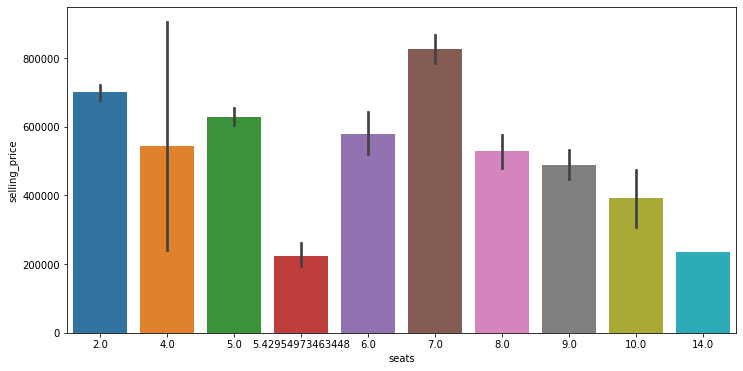

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot('seats', 'selling_price', data=train)

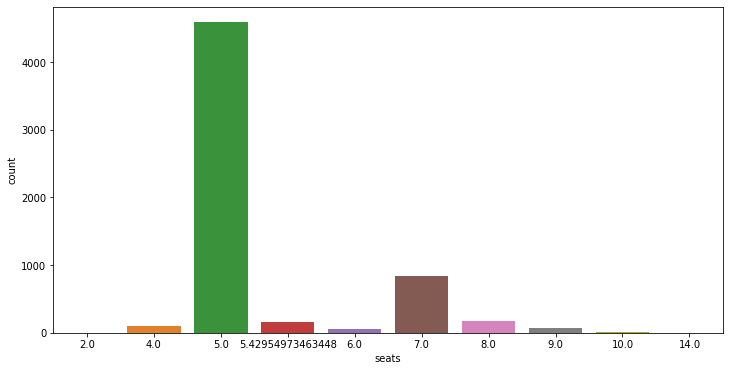

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot('seats', data=train)

#Converting seats values to be in line with the category

In [ ]:
for i in train.index:
    value = train['seats'][i]
    if value >= 5.0 and value < 6.0:
        train['seats'][i] = 5


In [ ]:
for i in test.index:
    value = test['seats'][i]
    if value >= 5.0 and value < 6.0:
        test['seats'][i] = 5
test

,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,1,2016,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.50,5.0,153.00,3800.000000
1,2,2017,35000,Petrol,Individual,Manual,First Owner,17.80,1497.0,117.30,5.0,145.00,4600.000000
2,3,2014,80000,Petrol,Individual,Manual,First Owner,19.10,1197.0,82.00,5.0,114.00,4000.000000
3,4,2014,145241,Diesel,Individual,Manual,First Owner,12.05,2179.0,120.00,7.0,290.00,3247.443842
4,5,2015,92651,Diesel,Dealer,Manual,First Owner,21.70,1498.0,98.96,5.0,215.00,3247.443842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,2020,2000,Petrol,Dealer,Manual,First Owner,20.70,1197.0,81.86,5.0,113.75,4000.000000
2124,2125,2018,100000,Diesel,Individual,Manual,Second Owner,28.40,1248.0,74.02,5.0,190.00,2000.000000
2125,2126,2011,172000,Diesel,Individual,Manual,Second Owner,17.88,1396.0,52.80,5.0,85.00,2500.000000
2126,2127,2017,47000,Diesel,Individual,Manual,Second Owner,19.67,1582.0,126.20,5.0,259.90,3247.443842


# Encoding labels

In [ ]:
ownertypemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['owner']))}
ownertypemapping.update({"null": 0 })
invownertypemapping = {v : x for x, v in ownertypemapping.items()}
train['owner'] = train['owner'].map(ownertypemapping).astype(float)
train

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,2018,850000,9500,Diesel,Individual,Manual,1.0,21.50,1497.0,108.50,5.0,260.000000,3223.178876
1,2018,750000,30000,Diesel,Individual,Manual,1.0,21.19,1396.0,88.76,5.0,219.660000,3223.178876
2,2015,1500000,80000,Diesel,Individual,Automatic,3.0,12.55,2982.0,168.50,7.0,360.000000,3223.178876
3,2015,795000,35000,Petrol,Individual,Manual,1.0,17.01,1591.0,121.30,5.0,154.900000,4200.000000
4,2019,3800000,20000,Diesel,Individual,Automatic,1.0,18.00,1969.0,190.00,5.0,19.388137,3223.178876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,235000,50000,Petrol,Individual,Manual,1.0,19.00,998.0,66.10,5.0,90.000000,3500.000000
5996,2018,390000,40000,CNG,Individual,Manual,1.0,26.60,998.0,58.16,5.0,77.000000,3500.000000
5997,2018,450000,75000,Petrol,Individual,Manual,1.0,20.30,1199.0,84.00,5.0,114.000000,3500.000000
5998,2011,250000,100000,Diesel,Individual,Manual,3.0,15.96,2523.0,63.00,9.0,180.000000,3223.178876


In [ ]:
fueltypemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['fuel']))}
fueltypemapping.update({"null": 0})
invfueltypemapping = {v : x for x, v in fueltypemapping.items()}
train['fuel'] = train['fuel'].map(fueltypemapping).astype(float)
train

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,2018,850000,9500,2.0,Individual,Manual,1.0,21.50,1497.0,108.50,5.0,260.000000,3223.178876
1,2018,750000,30000,2.0,Individual,Manual,1.0,21.19,1396.0,88.76,5.0,219.660000,3223.178876
2,2015,1500000,80000,2.0,Individual,Automatic,3.0,12.55,2982.0,168.50,7.0,360.000000,3223.178876
3,2015,795000,35000,4.0,Individual,Manual,1.0,17.01,1591.0,121.30,5.0,154.900000,4200.000000
4,2019,3800000,20000,2.0,Individual,Automatic,1.0,18.00,1969.0,190.00,5.0,19.388137,3223.178876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,235000,50000,4.0,Individual,Manual,1.0,19.00,998.0,66.10,5.0,90.000000,3500.000000
5996,2018,390000,40000,1.0,Individual,Manual,1.0,26.60,998.0,58.16,5.0,77.000000,3500.000000
5997,2018,450000,75000,4.0,Individual,Manual,1.0,20.30,1199.0,84.00,5.0,114.000000,3500.000000
5998,2011,250000,100000,2.0,Individual,Manual,3.0,15.96,2523.0,63.00,9.0,180.000000,3223.178876


In [ ]:
transmissionmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['transmission']))}
transmissionmapping.update({"null": 0})
invtransmissionmapping = {v : x for x, v in transmissionmapping.items()}
train['transmission'] = train['transmission'].map(transmissionmapping).astype(float)
train

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,2018,850000,9500,2.0,Individual,2.0,1.0,21.50,1497.0,108.50,5.0,260.000000,3223.178876
1,2018,750000,30000,2.0,Individual,2.0,1.0,21.19,1396.0,88.76,5.0,219.660000,3223.178876
2,2015,1500000,80000,2.0,Individual,1.0,3.0,12.55,2982.0,168.50,7.0,360.000000,3223.178876
3,2015,795000,35000,4.0,Individual,2.0,1.0,17.01,1591.0,121.30,5.0,154.900000,4200.000000
4,2019,3800000,20000,2.0,Individual,1.0,1.0,18.00,1969.0,190.00,5.0,19.388137,3223.178876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,235000,50000,4.0,Individual,2.0,1.0,19.00,998.0,66.10,5.0,90.000000,3500.000000
5996,2018,390000,40000,1.0,Individual,2.0,1.0,26.60,998.0,58.16,5.0,77.000000,3500.000000
5997,2018,450000,75000,4.0,Individual,2.0,1.0,20.30,1199.0,84.00,5.0,114.000000,3500.000000
5998,2011,250000,100000,2.0,Individual,2.0,3.0,15.96,2523.0,63.00,9.0,180.000000,3223.178876


In [ ]:
sellermapping = {label:idx+1 for idx, label in enumerate(np.unique(train['seller_type']))}
sellermapping.update({"null": 0})
invsellermapping = {v : x for x, v in sellermapping.items()}
train['seller_type'] = train['seller_type'].map(sellermapping).astype(float)
train

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,2018,850000,9500,2.0,2.0,2.0,1.0,21.50,1497.0,108.50,5.0,260.000000,3223.178876
1,2018,750000,30000,2.0,2.0,2.0,1.0,21.19,1396.0,88.76,5.0,219.660000,3223.178876
2,2015,1500000,80000,2.0,2.0,1.0,3.0,12.55,2982.0,168.50,7.0,360.000000,3223.178876
3,2015,795000,35000,4.0,2.0,2.0,1.0,17.01,1591.0,121.30,5.0,154.900000,4200.000000
4,2019,3800000,20000,2.0,2.0,1.0,1.0,18.00,1969.0,190.00,5.0,19.388137,3223.178876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,235000,50000,4.0,2.0,2.0,1.0,19.00,998.0,66.10,5.0,90.000000,3500.000000
5996,2018,390000,40000,1.0,2.0,2.0,1.0,26.60,998.0,58.16,5.0,77.000000,3500.000000
5997,2018,450000,75000,4.0,2.0,2.0,1.0,20.30,1199.0,84.00,5.0,114.000000,3500.000000
5998,2011,250000,100000,2.0,2.0,2.0,3.0,15.96,2523.0,63.00,9.0,180.000000,3223.178876


In [ ]:
test['fuel'] = test['fuel'].map(fueltypemapping).astype(float)
test

,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,1,2016,11000,4.0,Dealer,Automatic,First Owner,14.30,1598.0,103.50,5.0,153.00,3800.000000
1,2,2017,35000,4.0,Individual,Manual,First Owner,17.80,1497.0,117.30,5.0,145.00,4600.000000
2,3,2014,80000,4.0,Individual,Manual,First Owner,19.10,1197.0,82.00,5.0,114.00,4000.000000
3,4,2014,145241,2.0,Individual,Manual,First Owner,12.05,2179.0,120.00,7.0,290.00,3247.443842
4,5,2015,92651,2.0,Dealer,Manual,First Owner,21.70,1498.0,98.96,5.0,215.00,3247.443842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,2020,2000,4.0,Dealer,Manual,First Owner,20.70,1197.0,81.86,5.0,113.75,4000.000000
2124,2125,2018,100000,2.0,Individual,Manual,Second Owner,28.40,1248.0,74.02,5.0,190.00,2000.000000
2125,2126,2011,172000,2.0,Individual,Manual,Second Owner,17.88,1396.0,52.80,5.0,85.00,2500.000000
2126,2127,2017,47000,2.0,Individual,Manual,Second Owner,19.67,1582.0,126.20,5.0,259.90,3247.443842


In [ ]:
test['seller_type'] = test['seller_type'].map(sellermapping).astype(float)
test

,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,1,2016,11000,4.0,1.0,Automatic,First Owner,14.30,1598.0,103.50,5.0,153.00,3800.000000
1,2,2017,35000,4.0,2.0,Manual,First Owner,17.80,1497.0,117.30,5.0,145.00,4600.000000
2,3,2014,80000,4.0,2.0,Manual,First Owner,19.10,1197.0,82.00,5.0,114.00,4000.000000
3,4,2014,145241,2.0,2.0,Manual,First Owner,12.05,2179.0,120.00,7.0,290.00,3247.443842
4,5,2015,92651,2.0,1.0,Manual,First Owner,21.70,1498.0,98.96,5.0,215.00,3247.443842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,2020,2000,4.0,1.0,Manual,First Owner,20.70,1197.0,81.86,5.0,113.75,4000.000000
2124,2125,2018,100000,2.0,2.0,Manual,Second Owner,28.40,1248.0,74.02,5.0,190.00,2000.000000
2125,2126,2011,172000,2.0,2.0,Manual,Second Owner,17.88,1396.0,52.80,5.0,85.00,2500.000000
2126,2127,2017,47000,2.0,2.0,Manual,Second Owner,19.67,1582.0,126.20,5.0,259.90,3247.443842


In [ ]:
test['transmission'] = test['transmission'].map(transmissionmapping).astype(float)
test

,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,1,2016,11000,4.0,1.0,1.0,First Owner,14.30,1598.0,103.50,5.0,153.00,3800.000000
1,2,2017,35000,4.0,2.0,2.0,First Owner,17.80,1497.0,117.30,5.0,145.00,4600.000000
2,3,2014,80000,4.0,2.0,2.0,First Owner,19.10,1197.0,82.00,5.0,114.00,4000.000000
3,4,2014,145241,2.0,2.0,2.0,First Owner,12.05,2179.0,120.00,7.0,290.00,3247.443842
4,5,2015,92651,2.0,1.0,2.0,First Owner,21.70,1498.0,98.96,5.0,215.00,3247.443842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,2020,2000,4.0,1.0,2.0,First Owner,20.70,1197.0,81.86,5.0,113.75,4000.000000
2124,2125,2018,100000,2.0,2.0,2.0,Second Owner,28.40,1248.0,74.02,5.0,190.00,2000.000000
2125,2126,2011,172000,2.0,2.0,2.0,Second Owner,17.88,1396.0,52.80,5.0,85.00,2500.000000
2126,2127,2017,47000,2.0,2.0,2.0,Second Owner,19.67,1582.0,126.20,5.0,259.90,3247.443842


In [ ]:
test['owner'] = test['owner'].map(ownertypemapping).astype(float)
test

,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm
0,1,2016,11000,4.0,1.0,1.0,1.0,14.30,1598.0,103.50,5.0,153.00,3800.000000
1,2,2017,35000,4.0,2.0,2.0,1.0,17.80,1497.0,117.30,5.0,145.00,4600.000000
2,3,2014,80000,4.0,2.0,2.0,1.0,19.10,1197.0,82.00,5.0,114.00,4000.000000
3,4,2014,145241,2.0,2.0,2.0,1.0,12.05,2179.0,120.00,7.0,290.00,3247.443842
4,5,2015,92651,2.0,1.0,2.0,1.0,21.70,1498.0,98.96,5.0,215.00,3247.443842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,2020,2000,4.0,1.0,2.0,1.0,20.70,1197.0,81.86,5.0,113.75,4000.000000
2124,2125,2018,100000,2.0,2.0,2.0,3.0,28.40,1248.0,74.02,5.0,190.00,2000.000000
2125,2126,2011,172000,2.0,2.0,2.0,3.0,17.88,1396.0,52.80,5.0,85.00,2500.000000
2126,2127,2017,47000,2.0,2.0,2.0,3.0,19.67,1582.0,126.20,5.0,259.90,3247.443842


# Modelling

In [ ]:
Y = train['selling_price']
train.drop(['selling_price'], axis = 1, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)


In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_train_pred_lr = lm.predict(x_train)
y_test_pred_lr = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred_lr))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)))
print('R2 Score:', r2_score(y_train, y_train_pred_lr))
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))
print('R2 Score:', r2_score(y_test, y_test_pred_lr))

Train set:
MAE: 271050.9495418166
MSE: 201033577215.039
RMSE: 448367.6808324157
R2 Score: 0.6917419409445831
Test set:
MAE: 275302.62842418085
MSE: 206262379322.4653
RMSE: 454161.1820955918
R2 Score: 0.6798219363015712


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt = DecisionTreeRegressor(splitter='best', max_depth=9)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
y_train_pred_dtr = dt.predict(x_train)

In [ ]:
y_train_test_dtr = dt.predict(x_test)

In [ ]:
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred_dtr))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_dtr)))
print('R2 Score:', r2_score(y_train, y_train_pred_dtr))
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, y_train_test_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_train_test_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_train_test_dtr)))
print('R2 Score:', r2_score(y_test, y_train_test_dtr))

Train set:
MAE: 64916.30743488843
MSE: 9781583143.348671
RMSE: 98901.88644989878
R2 Score: 0.9850012526463053
Test set:
MAE: 84774.80945277655
MSE: 33949757529.839153
RMSE: 184254.59975218843
R2 Score: 0.9473002897346529


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
forest = RandomForestRegressor(criterion='mse', random_state=42)
para_grids = {
            "n_estimators" : [10,50,100,500],
            "max_features" : ["auto", "log2", "sqrt"],
            'max_depth' : [4,5,6,7,8,9,15,20],
            "bootstrap"    : [True, False]
        }


Grid = GridSearchCV(forest, para_grids,cv= 5)
Grid.fit(x_train, y_train)
best_param = Grid.best_estimator_
print(best_param)
scores = cross_val_score(best_param, x_train, y_train, cv=5)


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
                      max_features='log2', random_state=42)


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.01


In [ ]:
y_train_pred_rfr = best_param.predict(x_train)

In [ ]:
y_test_pred_rfr = best_param.predict(x_test)

In [ ]:
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred_rfr))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rfr)))
print('R2 Score:', r2_score(y_train, y_train_pred_rfr))
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfr)))
print('R2 Score:', r2_score(y_test, y_test_pred_rfr))

Train set:
MAE: 22472.64633100443
MSE: 1179429858.7757158
RMSE: 34342.82834560537
R2 Score: 0.9981915023147138
Test set:
MAE: 64787.61109698005
MSE: 14606789021.337318
RMSE: 120858.54964104657
R2 Score: 0.9773260958151185


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=int(np.sqrt(train.shape[0])))
knn.fit(x_train, y_train)


KNeighborsRegressor(n_neighbors=77)

In [ ]:
y_train_pred_knn = knn.predict(x_train)

In [ ]:
y_test_pred_knn = knn.predict(x_test)

In [ ]:
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred_knn ))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred_knn ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_knn )))
print('R2 Score:', r2_score(y_train, y_train_pred_knn ))
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_knn)))
print('R2 Score:', r2_score(y_test, y_test_pred_knn))

Train set:
MAE: 295253.10165854974
MSE: 314075928523.95044
RMSE: 560424.7750804299
R2 Score: 0.5184066390100621
Test set:
MAE: 307066.1976082251
MSE: 319820344978.3389
RMSE: 565526.6085502423
R2 Score: 0.503547573130438


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42, n_estimators=1000)
para_grids = {
            "n_estimators" : [10,50,100,500],
            "max_features" : ["auto", "log2", "sqrt"],
            'max_depth' : [4,5,6,7,8,9,15,20],
            
        }


Gridz = GridSearchCV(gbr, para_grids,cv= 5)
Gridz.fit(x_train, y_train)
best_params = Gridz.best_estimator_

In [ ]:
y_train_pred_gbr = best_params.predict(x_train)

In [ ]:
y_test_pred_gbr = best_params.predict(x_test)

In [ ]:
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred_gbr ))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred_gbr ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_gbr )))
print('R2 Score:', r2_score(y_train, y_train_pred_gbr ))
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred_gbr))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_gbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_gbr)))
print('R2 Score:', r2_score(y_test, y_test_pred_gbr))

Train set:
MAE: 34117.89562082987
MSE: 2505067021.9947968
RMSE: 50050.64457122202
R2 Score: 0.9961588153148275
Test set:
MAE: 65757.5715991281
MSE: 15279839560.624752
RMSE: 123611.64815916319
R2 Score: 0.9762813293426862


# Comparison of the R^2 score between the different models

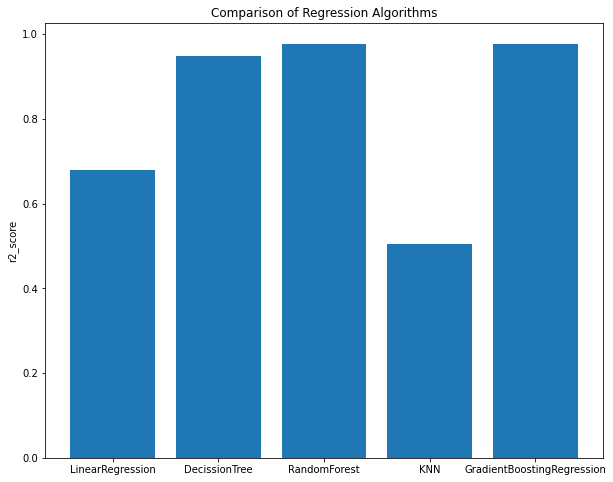

In [ ]:
plt.figure(figsize=(10,8))
y = np.array([r2_score(y_test,y_test_pred_lr), r2_score(y_test, y_train_test_dtr),r2_score(y_test, y_test_pred_rfr),r2_score(y_test, y_test_pred_knn),r2_score(y_test, y_test_pred_gbr)])
x = ["LinearRegression","DecissionTree","RandomForest","KNN","GradientBoostingRegression"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()

In [ ]:
test.drop('Id', axis = 1, inplace = True)

In [ ]:
sample = sample.drop(['Predicted'], axis = 1)

In [ ]:
sample['Predicted'] = best_params.predict(test)

In [ ]:
Final = pd.DataFrame(sample)

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='final.csv') 

In [ ]:
Final.to_csv('final.zip', index=False,
          compression=compression_opts)